[Back to Table of Contents](https://www.shannonmburns.com/Psyc158/intro.html)

[Previous: Chapter 5 - Describing Data](https://colab.research.google.com/github/smburns47/Psyc158/blob/main/chapter-5.ipynb)

In [2]:
# This chapter uses some packages that take a few minutes to download on Google Colab. 
# Run this first so it's ready by the time you need it
install.packages("readr")
library(readr)
install.packages("dplyr")
library(dplyr)
install.packages("ggformula")
library(ggformula)

Installing package into ‘/Library/Frameworks/R.framework/Versions/4.2-arm64’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//RtmpOT4iU8/downloaded_packages


Installing package into ‘/Library/Frameworks/R.framework/Versions/4.2-arm64’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//RtmpOT4iU8/downloaded_packages



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/Library/Frameworks/R.framework/Versions/4.2-arm64’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//RtmpOT4iU8/downloaded_packages


Loading required package: ggplot2

Loading required package: ggstance


Attaching package: ‘ggstance’


The following objects are masked from ‘package:ggplot2’:

    geom_errorbarh, GeomErrorbarh


Loading required package: scales


Attaching package: ‘scales’


The following object is masked from ‘package:readr’:

    col_factor


Loading required package: ggridges


New to ggformula?  Try the tutorials: 
	learnr::run_tutorial("introduction", package = "ggformula")
	learnr::run_tutorial("refining", package = "ggformula")



# Chapter 6 - Variation in Multiple Variables

## 6.1 Explanation

Examining distributions of single variables is always an important starting place. This helps us describe that variable in an efficient way, which is one of the central goals of statistics. But as data analysts, our interests usually go beyond exploring patterns of variation in a single variable. Sometimes we want to predict what data of that variable will look like, or sometimes we want to make inferences about connections between multiple variables. To do these goals of statistics, we need to consider multiple variables at once. 

When using information about one variable to help us predict/understand another variable, we would say the first variable helps **explain** the second. If knowing someone’s score on one variable helps you make a slightly better guess about that person’s score on another variable, then we can say that the first variable explains some variation in the second variable.

For example, if we knew someone’s sex, could that help us make a better prediction of their height? You probably already have a sense that human males are taller, on average, than females. If we knew that someone was male, even without meeting them, we would predict that they would be taller than if we knew they were female.

This is what we mean when we say sex explains some of the variation in height. It doesn’t explain all the variation because some females are taller than some males. But it does explain some of the variation.

It's important to emphasize here that when we say one variable A "explains" another variable B, we don't always mean that A *causes* B. Correlation does not imply causation! It just means that knowing the value of some observation on A improves our guess on what B is. This could be because of causation, but it could also be a host of many different relationships (maybe B causes A instead, or a separate variable C causes both of them!). Whenever we use the word "explain" in this course, make sure you're not automatically assuming that a causal relationship is involved.  

The kind of statistics that link multiple variables together is called **inferential statistics**. However in this chapter we won't actually learn those quantitative tools yet - we'll spend a lot of time on them in the next unit. Instead we will develop some informal intuitions for understanding connections between variables and will grow our data visualization skills that help us see these relationships. 

## 6.2 Explaning one variable with another

Let's start by loading a simple dataset that includes information about stats students:

In [3]:
studentdata <- read_csv("https://raw.githubusercontent.com/smburns47/Psyc158/main/studentdata.csv")

Rows: 157 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): Sex, RaceEthnic, Job, MathAnxious, StatsInterest, GradePredict, Ca...
dbl (10): Siblings, IDLast, CollegeYear, SleepHours, Thumb, Index, Middle, R...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Write code to draw a histogram of the variable ```Thumb```, which corresponds to each person's thumb length. We'll use ```gf_histogram()```, so feel free to play around with features like labels, colors, bin number, etc. The documentation of all the arguments ```gf_histogram()``` can take is [here](https://www.rdocumentation.org/packages/ggformula/versions/0.10.1/topics/gf_histogram). 

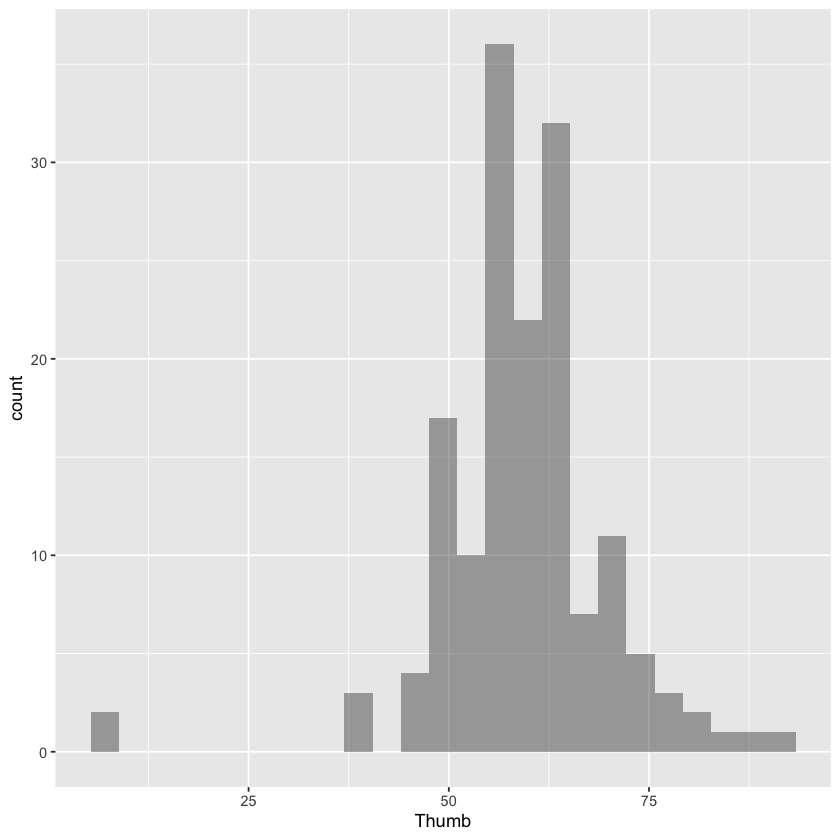

In [4]:
gf_histogram(~ Thumb, data = studentdata)

Quickly evaluating the distribution, it looks like most of the thumbs run between 40 and 80 mm long; the center of the distribution is somewhere around 60 mm; and the distribution is kind of normal-shaped, with most of the observations clustered around the middle, then just a few observations in the outer tails.

Let’s say we want to check some other variable to see if it explains the variation we see in thumb length. A starting place is to think about other variables that, if we knew someone’s score on that variable, would help us make a better guess about their thumb length. Below is a list of some of the variables in ```student``` and descriptions of how they were coded. Which of these variables might be related to thumb length? 

- ```Sex```: female, male, non-binary, or prefer not to answer
- ```RaceEthnic```: White, African-American, Asian, Latino, Middle Eastern, or Other
- ```Siblings```: Number of siblings someone has
- ```IDLast```: Last digit of their student ID number
- ```CollegeYear```: Year in college
- ```Job```: Respondant's job status; Not Working, Part-time Job, or Full-time Job
- ```MathAnxious```: Agreement with the statement, "In general, I tend to feel very anxious about mathematics." strongly agree, agree, neither agree not disagree, disagree, strongly disagree
- ```StatsInterest```: How interested respondant is in statistics; No Interest, Somewhat Interested, or Very Interested
- ```GradePredict```: Anticipated course letter grade
- ```SleepHours```: How much sleep respondant got the night before
- ```Height```: Height in inches

One variable that might explain the variation in thumb length is ```Sex```. You might intuitively sense that male and female thumb lengths would differ, or vary. But then again, even among a bunch of females, their thumb lengths vary too.

In our basic histogram right now, we can't see the **effect** of taking ```Sex``` into account. We don't know which data points correspond to female, male, or other participants. But we can change this histogram to visualize the relationship between ```Thumb``` and ```Sex``` in a few ways. One way is by coloring or filling in the data in the histogram by ```Sex```, assigning females to one color and males another.

To do this we use the ```fill =``` argument again in ```gf_histogram()```, but instead of putting in a color we put a tilde (```~```) and then the name of a variable: ```fill = ~ Sex```. Remember that a ```~``` in functions like this is like saying "vary by", or "is explained by", followed by the variable you care about.

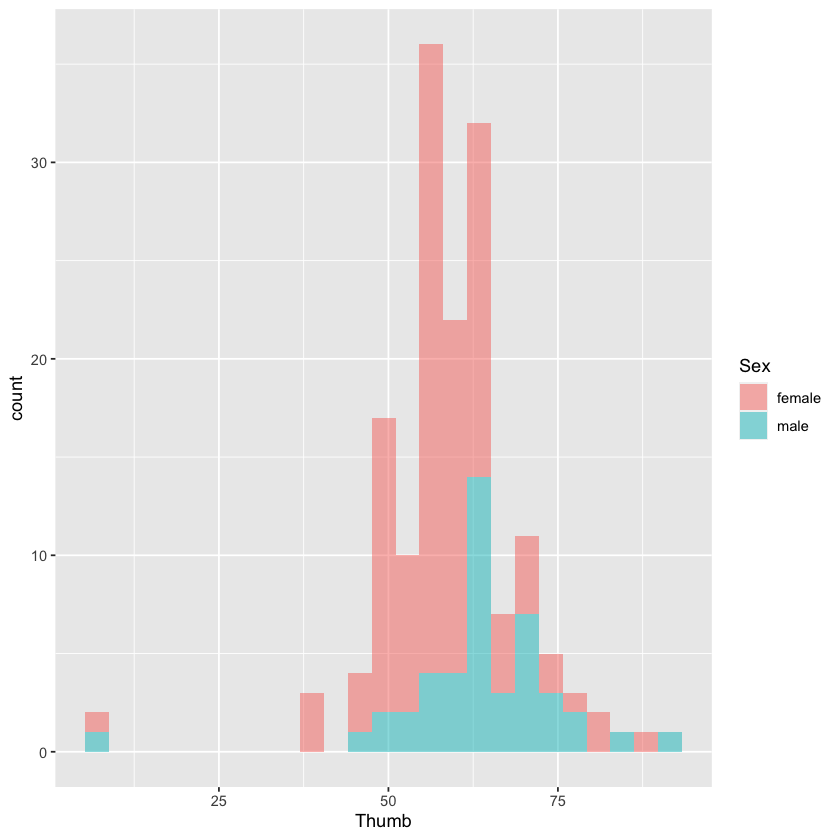

In [5]:
gf_histogram(~ Thumb, data = studentdata, fill = ~ Sex)

Whenever you color data with another variable in ```gf_histogram()```, it uses default colors. If you want to change them, we can use another handy function, ```gf_refine()```, that will take an already-built histogram and make some changes to it. For example, here’s the R code to change the colors of this histogram.

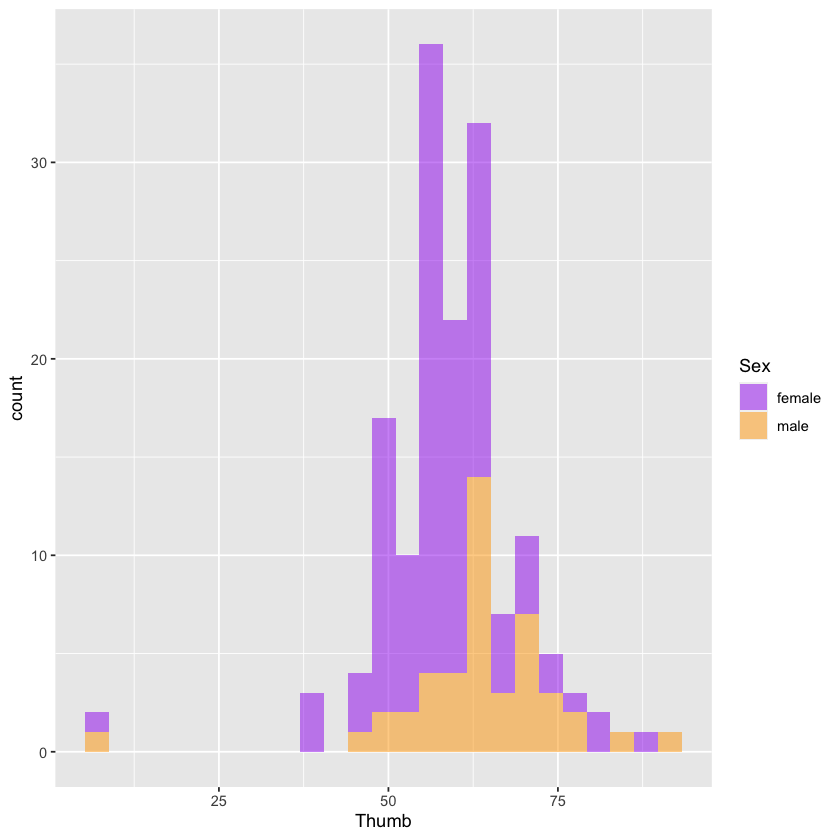

In [6]:
# graphics plots can be saved as objects; when you do, they won't automatically print to the console
thumb_by_sex <- gf_histogram(~ Thumb, data = studentdata, fill = ~ Sex)
gf_refine(thumb_by_sex, scale_fill_manual(values = c("purple", "orange")))

```gf_refine()``` takes a histogram object as a first argument, and then another function as a second argument that we want to apply to that histogram. In this case, we used the graphic function ```scale_fill_manual()``` which allows us to manually define the colors we want for each unique value in ```Sex``` (make sure to use no more and no fewer colors than values to be colored!)

Now is also a time we can introduce a really powerful R functionality that most other coding languages don't have. Notice above how, in order to use ```gf_refine()```, we had to build an object first containing the base histogram. Ultimately we did two things to this histogram - build it, and refine the colors. That's not too onerous, but it can get annoying to type and tougher to read if there are many changes you want to make to an object in a step-by-step way, and thus you have to keep redefining an object. Enter the "pipe" operator, which is three symbols together that look like this: ```%>%```. The pipe lets you take the output of one function and immediately pass it as an argument in another function, without having to save it to an object first. Below is how we would build the exact same colored histogram as above, but using a pipe:

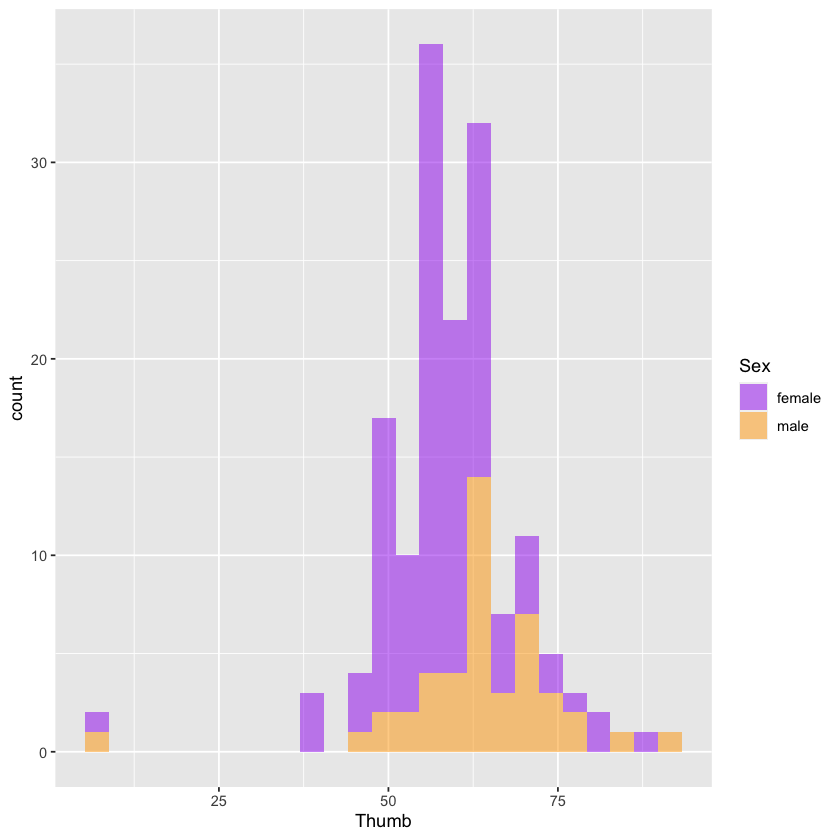

In [7]:
gf_histogram(~ Thumb, data = studentdata, fill = ~ Sex) %>%
    gf_refine(., scale_fill_manual(values = c("purple", "orange")))

Notice the two changes we made: 1) there is a pipe after the initial histogram command, which is saying "take the results of this and pass it to the following function"; 2) on the next line, ```gf_refine()``` is missing its first argument, replaced by a dot, because it is implied by what the pipe is giving it. 

<div class="alert alert-block alert-info">
<b>Note</b>: %>% passes an object on the left hand side as an argument of the function on the righthand side. We are using a "." to show you where that argument is being passed to. However, if it's the first argument, R actually lets you leave it out entirely and type as if there's no first argument in the second function at all. However, for learning purposes we'll leave it in here. If you want to pass it as a second or later argument, you do have to include a "." in that argument spot.
</div>

Another way to examine the male and female data is to split the histogram we made into two different pictures: one for females and another for males. We can chain on (using ```%>%```) the command ```gf_facet_grid()``` after ```gf_histogram()```. This will split the base histogram into separate histograms of ```Thumb``` for females and for males in a grid.

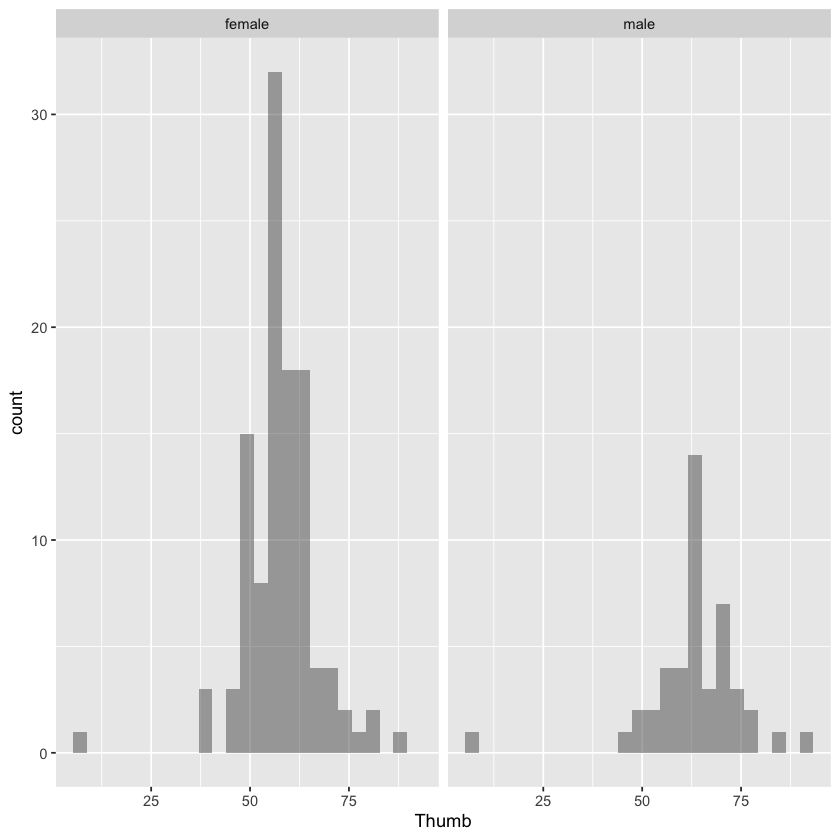

In [8]:
gf_histogram(~ Thumb, data = studentdata) %>% 
  gf_facet_grid(., ~ Sex)

Using either the colored histogram or the separate histograms, does it seem like thumb length varies as a function of sex?

Remember that putting something after the ```~``` means something gets changed on the x-axis. ```gf_facet_grid()``` works the same way. Putting the variable ```Sex``` after the ```~``` puts these two graphs in a row along the x-axis. Putting ```Sex``` *before* the ```~``` puts these two graphs in a column along the y-axis. The only difference is we have to include a period after the ```~```, because this function always expects something after the ```~``` but we don't have any variable we want to plot along the x-axis.

In [ ]:
gf_histogram(~ Thumb, data = fingers) %>% 
  gf_facet_grid(., Sex ~ .)

This is more helpful than side-by-side because it’s easier to compare where the distributions are along the same ```Thumb``` axis. It seems that the distribution of thumb lengths for males is shifted higher relative to the female distribution.

Also, it is immediately apparent that there are fewer males than females. This is when a measure like density (rather than count) comes in handy - it lets you see the distribution relative to itself rather than the range of values somewhere else.

Adjust the following code to re-create these histograms as density histograms. 

In [ ]:
# Modify this code to create density histograms
gf_histogram(~ Thumb, data = fingers) %>%
gf_facet_grid(., Sex ~ .)


Another way of thinking about ```Sex``` explaining variation in ```Thumb``` is to say that ```Thumb``` is really made up of two different distributions, one for males and one for females. Although the shape of these two histograms are roughly normal, the average male thumb is bigger than the average female thumb. It almost seems like the whole male distribution is shifted higher along the x-axis. The center of the distribution is different across the two groups.

This isn’t to say that just because we know someone’s sex we definitely know their thumb length. After all, there are both males and females with longer thumbs and both males and females with shorter thumbs. This variation among members of the same group is called **within-group variation**. When we combine all the thumbs together in a single histogram, we are able to see how spread-out the overall distribution is. This gives us an idea of the total variation. When we divide the distribution up and look separately at the two histograms, we can see the within-group variation.

Besides finding a difference in group means, notice that these group-specific histograms tend to have less variation than the single histogram. It’s as if some of the variation in ```Thumb``` has been *accounted for* by ```Sex```. Because we can only see the within-group variation after we divide the distribution up by ```Sex```, another name for within-group variation is "leftover variation."

Even though there is still a lot of variation in thumb length left over after taking out the role of ```Sex```, it is still true that if we know someone’s sex we can be a little better at predicting their thumb length. A little better may not be great, but it is better than nothing.

Now, remember any other variable you thought might be related to ```Thumb```. Make a grid of histograms to investigate the association of that variable with thumb length. (Use a categorical variable for this exercise.)

In [ ]:
# Write your code here to plot histograms of thumb and another variable


Here are a few example histograms you could have made. The gray histograms on the left make a grid of thumb length based on year in college. The colorful histograms are based on Race/Ethnicity.

In [ ]:
gf_histogram(~ Thumb, data = fingers) %>% 
  gf_facet_grid(., Year ~ .) 

gf_dhistogram(~ Thumb, data = fingers, fill = ~ RaceEthnic) %>% 
  gf_facet_grid(., RaceEthnic ~ .) 

Of the two variables used to create the faceted histograms above (year in college and race/ethnicity), which do you think does a better job predicting thumb length?

## 6.3 Outcomes and explanatory variables

We now have a sense of what it means to explain variation in one variable by variation in another. In the previous section, for example, we saw that variation in thumb length could be explained, in part, by variation in sex. In this section we want to begin developing a language for describing the variables that play different roles in these relationships — relationships in which one variable explains variation in another.

Up to this point, we have distinguished between qualitative variables and quantitative variables. But our desire to explain variation in one variable with variation in another variable leads us to make another distinction, that is, between an outcome variable and an explanatory variable.

The **outcome variable** is the variable whose variation we are trying to explain. It is the "target" thing we are trying to understand, and the "outcome" of some process we think led to it. In this course, the tools and methods we use will focus on a single outcome variable at one time.

The **explanatory variables** are the variables we use to explain variation in the outcome variable. Although we will initially consider only one explanatory variable at a time, later in this course we will allow for the possibility of using multiple explanatory variables at a time.

You may or may not have heard the terms “outcome variable” and “explanatory variable” before. We will use these terms throughout, but if you’ve taken statistics before, or read any research reports, you will no doubt have encountered a number of different terms used to represent the same distinction. Some of these are presented in the table below.

| Outcome variable        | Explanatory variable      |
| :---------------------: | :-----------------------: |
| Dependent variable (DV) | Independent variable (IV) |
| Predicted variable      | Predictor variable        | 
| Response variable       | Treatment variable        |
| Output variable         | Experimental variable     |

It is important to figure out whether a variable is quantitative or qualitative. But it is equally important to figure out whether a variable is an outcome or explanatory variable. Making this latter distinction requires a greater understanding of the context that the data pertain to, and the purpose for collecting the data. Let’s think about a situation and try to figure out what the outcome variable might be.

In the ```MindsetMatters``` data frame, we have the results of an experiment where a researcher informed a randomly chosen group of housekeepers (41 of them) that the work they do satisfies the Surgeon General’s recommendations for an active lifestyle (which is true). They were also given examples to illustrate why their work is considered good exercise. The other 34 housekeepers were told nothing.

Whether an individual housekeeper was informed or not was recorded in the variable called ```Condition``` (either Informed or Uninformed). The researcher also recorded each housekeeper's weight after four weeks in a variable called ```Wt2```. Let's make a new variable called ```WtLoss``` that codes whether someone decreased in weight. Then the first six rows of the data frame for these two variables are shown below.

In [ ]:
mindsetmatters <- read_csv("https://raw.githubusercontent.com/smburns47/Psyc158/main/mindsetmatters.csv")
mindsetmatters$WtLost <- (mindsetmatters$Wt - mindsetmatters$Wt2) < 0 
# using select() function loaded from dplyr
head(select(mindsetmatters, Condition, WtLost))

Which of these is the explanatory variable, and which is the outcome? 

Here, ```WtLost``` is the outcome variable because it's the variable we ultimately care about - it's the one where we want to know what produces changes in it. The explanatory variable is ```Condition```, because we plan to analyze the dataset in a way where ```Condition``` will explain some variation in ```WtLost```. 

Because these are both categorical variables, it's not possible to make a nice normal distribution histogram like we saw above. Instead, here's a bar graph to visualize the distribution of ```WtLost``` (using a function ```gf_bar()```).

In [ ]:
gf_bar(~ WtLost, data = mindsetmatters)

You can use ```gf_facet_grid()``` with any plot, not just histograms. Try creating a bar graph of ```WtLost``` (like the one above), but chain on a facet grid to compare the outcome across conditions.

In [ ]:
# Create a bar graph of WtLost, then use gf_facet_grid() to compare the outcome across groups of Condition


So far we have considered both numerical (e.g., ```Thumb```) and categorical (e.g., ```WtLost```) outcomes. We have also looked at some categorical explanatory variables (e.g., ```Sex``` and ```Condition```). But we haven’t yet looked at any examples of quantitative explanatory variables.

There isn’t any reason to think that we couldn’t. Perhaps a quantitative variable like age or initial weight might help us predict how much weight a housekeeper will lose. We'll come back to doing that in a moment.

## 6.4 Point and jitter plots

We have learned how to make visualizations of outcome variables as a function of explanatory variables (e.g., histograms and bar graphs in a facet grid). We will learn a few more visualizations in this section.

A **scatterplot** is a common way to show the relationship between an outcome variable and an explanatory variable. A scatterplot will show each data point as a dot on a graph, so that you can keep track of within-group variation at the same time. A scatterplot in ```ggformula``` can be made with the function ```gf_point()```. Let’s try using ```gf_point()``` to examine ```Thumb``` lengths by ```Sex```.

In [ ]:
gf_point(Thumb ~ Sex, data = fingers)

This is the first time we're including both the explanatory variable and the outcome variable in the same function call, on either side of the ```~``` symbol. This results in a plot that, instead of making two separate histograms of the outcome variable for each explanatory variable, makes points in a 2-D space that shows the value of each observation on each variable. 

You can change the color of the points with the argument ```color``` (much like we did before) and the size of the points with ```size```.

In [ ]:
gf_point(Thumb ~ Sex, data = fingers, color = "orange", size = 5) 


Sometimes with scatterplots like this, it's difficult to make out all the points because they overlap each other so closely. This is particularly a problem when you have two variables of categorical or ordinal data that can't have more than a few values:

In [ ]:
#Can you tell how many people have each explanatory/outcome pairing?
gf_point(MathAnxious ~ Interest, data = fingers, color = "blue")

We can **jitter** these points, or spread them out a little bit, so that you can see all the individual points better. We’ll use the function ```gf_jitter()``` to create a jitter plot depicting ```Thumb``` length by ```Sex```. This function is just like making a ```gf_point()``` plot, except that the points will be a little jittered both vertically and horizontally.

In [ ]:
gf_jitter(MathAnxious ~ Interest, data = fingers, color = "blue") 

But now they're *too* jittered though - it's hard to tell which points should correspond to each ordinal value. We can use the ```width``` and ```height``` arguments to change how the points get jittered. Height and width can be set to values between 0 and 1, which corresponds to the proportion of one unit in the variable value.

In [ ]:
gf_jitter(MathAnxious ~ Interest, data = fingers, color = "blue", width = 0.1, height = 0.1) 

Much easier to see! In a jitter plot, a point being more to the left or right within the group doesn’t mean anything. The jitter is some random repositioning so the points do not overlap too much and obscure how many data points have that value.

Just like a scatterplot, in a jitter plot you can change the size of the points by including the argument ```size```. You can also change the transparency of the points using the argument ```alpha```. ```alpha``` can take values from 0 (more transparent) to 1 (more opaque). This is another way of showing how many points are at one place - the darker the color, the more observations there. 

In [ ]:
gf_jitter(MathAnxious ~ Interest, data = fingers, color = "blue", size = 3, alpha = 0.2, width = 0.1, height = 0.1) 

Try making jitter plots for a few of the variables from the  ```fingers``` dataframe. Play around with some of the arguments such as ```height```, ```width```, ```color```, ```size```, and ```alpha``` ([here](https://www.rdocumentation.org/packages/ggformula/versions/0.10.1/topics/gf_jitter) are the possible arguments). Try making a jitter plot one way, then switching which variable is on the x-axis and which on the y-axis. Does it work both ways?

In [ ]:
# Play around with gf_jitter


There isn’t any restriction on what kind of variable you can put in the x- or y-axis for a jitter plot. You can put an outcome or explanatory variable in either position. You can also put a categorical or quantitative variable in either position. For example, in this jitter plot, we have put ```Sex``` on the y-axis and ```Thumb``` length on the x-axis.

In [ ]:
gf_jitter(Sex ~ Thumb, data = fingers, color = "orange", size = 3, height = 0.2) 


Even though you can put the outcome variable anywhere, it is more common to put the outcome variable on the y-axis. We will follow that convention in our jitter plots because it conforms with what people expect, and thus makes them easier to interpret.

## 6.5 Quantitative explanatory variables

Up to this point we have been using categorical predictor variables. How do we show variation between quantitative explanatory and quantitative outcome variables? There's no unique "bins" of data to put the explanatory data. 

You might think the best option is to create those bins, and turn the quantitative variable into a categorical one by, say, grouping everyone taller than the median height value into one bin and everyone shorter than the median into another. Or making three groups the same way by making bins for "short," "medium," and "tall." 

This is called **dichotomozing**, but it is actually bad practice for the majority of use cases. When we do this, we are throwing away some of the information we have in our data. We know exactly how many inches tall each person is - why not use that information instead of just categorizing people as either tall or short?

Let’s try another approach, a scatterplot of ```Thumb``` length by ```Height```. Try using ```gf_point()``` with ```Height``` on the x-axis. Remember: when making plots, the convention is to put the outcome variable on the y-axis, the explanatory variable on the x-axis.

In [ ]:
gf_point(Thumb ~ Height, data = fingers)

You can see the dots scattered around, but on a general upward trend. If you were to visualize a distribution on thumb for each general value of height, you would see that the distribution is slowly moving up. A student who is taller also tends to have a longer thumb, but there's not an exact relationship. 

So, just as when we explained the variance of ```Thumb``` with a categorical variable, there appears to be some variation in ```Thumb``` that is explained by ```Height```, but there is also variation left over after we have taken out the variation due to ```Height```. I.e., there is variation on ```Thumb``` at one value of ```Height```.

## 6.6 Putting multiple plots together

```gf_point()``` and ```gf_jitter()``` are useful. They emphasize that data are made up of individual numbers, and yet they help us to notice clusters of those individual points. There are times, however, when we want to transcend the individual data points and focus only on where the clusters are.

**Boxplots** are helpful in this regard, and are especially useful for comparing the features of the distribution of an outcome variable across different levels of a categorical explanatory variable.

Here’s how we would create a boxplot of ```Thumb``` length broken down by ```Sex```.

In [ ]:
gf_boxplot(Thumb ~ Sex, data = fingers)

In making boxplots we can play with the arguments ```color``` and ```fill``` much like we did before.

In [ ]:
gf_boxplot(Thumb ~ Sex, data = fingers, color = "orange")

Boxplots visually tell us the quantiles of the data. The rectangle at the center of the boxplot shows us where the middle 50% of the data points fall on the scale of the outcome variable. The thick line inside the box is the median. There are also lines, called whiskers, above and below the box. Another name for boxplot is box-and-whisker plot. The points that appear past the whiskers are considered outliers by this function (anything that is greater than 75%ile + 1.5\*IQR, or less than 25%ile - 1.5\*IQR). This isn't the only way to define an outlier, but is a pretty common one. The length of the whiskers depicts the max and min of the data range - when there are outliers, the end of the whisker depicts the max or min value that is not considered an outlier.

In ```ggformula```, we chain on multiple functions to put multiple types of plots in the same image. It's like adding a layer of one plot on top of a layer of the first one below it. When chaining between multiple ```gg_forumla``` plots, the later functions "inherits" the same variables and data so we don’t need to type those in again. Handy!

In [ ]:
gf_boxplot(Thumb ~ Sex, data = fingers, color = "orange") %>%
    gf_jitter(.)

In this situation where we are looking at the variation in ```Thumb``` length by ```Sex```, the boxes are in different vertical positions. The male box is higher than the female box. How do you think we should interpret the placement of the boxes?

Instead of an explanatory variable like ```Sex```, let’s try one that is unlikely to help us explain the variation in thumb length.

In [ ]:
# Modify this boxplot to look at Thumb length varying by Job instead of Sex
gf_boxplot(Thumb ~ Sex, data = fingers, color = ~ Sex) %>%
gf_jitter(., height = 0, color = "gray", alpha = .5, size = 3)


Notice that in this boxplot, the boxes are at approximately the same vertical position and are about the same size. The one exception is the box for the full-time level of ```Job```. The full-time box only includes one student, so, we wouldn’t want to draw any conclusions about the relationship between working full time and thumb length. Most of the students in the ```fingers``` data frame either work part-time or not at all. The thumbs of students with no job are not much longer or shorter than thumbs of students with part-time jobs. But within each group, their thumb lengths vary a lot. There are long-thumbed and short-thumbed students with part-time jobs and with no jobs. Thus, it doesn't seem like job type explains thumb length.

In summary, visualization helps see variation in data, and patterns of co-variation *between* variables reveals how they are related to each other. Below is are tables of all the visualization methods we learned in this chapter. It would be very helpful to keep this in your R cheatsheet to refer to whenever you need!

**Visualizations for one variable**

| Variable     | Visualization type | R code (```gg_formula``` package) |
| :----------: | :----------------: | :-------------------------------: |
| Categorical  | Bar graph          | ```gf_bar()```                    |
| Quantitative | Histogram          | ```gf_histogram()```              |
|              | Boxplot            | ```gf_boxplot()```                |

**Visualizations for two variables**

| Outcome variable | Explanatory variable | Visualization type          | R code (```gg_formula``` package)         |
| :--------------: |:-------------------: | :-------------------------: | :---------------------------------------: |
| Categorical      | Categorical          | Faceted bar graph           | ```gf_bar() %>% gf_facet_grid(.)```       |
| Quantitative     | Categorical          | Faceted histogram           | ```gf_histogram() %>% gf_facet_grid(.)``` |
|                  |                      | Boxplot                     | ```gf_boxplot()```                        |
|                  |                      | Jitter plot                 | ```gf_jitter()```                         |
| Categorical      | Quantitative         | Same as above, axes flipped |                                           |
| Quantitative     | Quantitative         | Scatterplot                 | ```gf_point()```                          |

## Chapter summary

After reading this chapter, you should be able to:

- Explain what "explain" means
- Change plots with faceting and colors
- Make the correct type of plot for each type of quantitative/categorical variable display

[Next: Chapter 7 - Principles of Data Visualization](https://colab.research.google.com/github/smburns47/Psyc158/blob/main/chapter-7.ipynb)